## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [ ]:
df.shape

c. The number of unique users in the dataset.

In [3]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [4]:
converted = df[df.converted == 1].user_id.nunique() / df.user_id.nunique()
converted

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [5]:
df[(df.group == 'treatment')&(df.landing_page != 'new_page')].count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [6]:
df[(df.group == 'control')&(df.landing_page != 'old_page')].count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df.group == 'control')&(df.landing_page == 'old_page'))|((df.group == 'treatment')&(df.landing_page == 'new_page'))]

In [9]:
df2.shape

(290585, 5)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2.user_id.value_counts()>1

773192     True
630732    False
811737    False
797392    False
795345    False
801490    False
799443    False
787157    False
793302    False
817882    False
842446    False
815835    False
805596    False
803549    False
809694    False
807647    False
895712    False
840399    False
836301    False
899810    False
834242    False
936604    False
934557    False
940702    False
938655    False
830144    False
828097    False
832195    False
838348    False
821956    False
          ...  
734668    False
736717    False
730574    False
775632    False
771538    False
642451    False
773587    False
783828    False
785877    False
779734    False
781783    False
759256    False
726472    False
748999    False
746950    False
753093    False
751044    False
740803    False
738754    False
744897    False
742848    False
634271    False
632222    False
636316    False
630169    False
650647    False
648598    False
654741    False
652692    False
630836    False
Name: user_id, Length: 2

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop_duplicates(subset = 'user_id')

In [15]:
df2.shape

(290584, 5)

In [16]:
(df2.user_id.value_counts()>1).sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
prob_converted = df2[df2.converted == 1].user_id.nunique() / df2.user_id.nunique()
prob_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
prob_control = df2[(df2.converted == 1)&(df2.group == 'control')].user_id.nunique() / df2[df2.group == 'control'].user_id.nunique()
prob_control


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
prob_treatment = df2[(df2.converted == 1)&(df2.group == 'treatment')].user_id.nunique() / df2[df2.group == 'treatment'].user_id.nunique()
prob_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
df2[df2.landing_page == 'new_page'].user_id.count()/df2.user_id.nunique()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [21]:
obs_diff = prob_control - prob_treatment
obs_diff

0.0015782389853555567

**=> Treatment group shows smaller conversion rate. Although the difference is very small and we cant say that clearly if the difference is significant or not, in case is not, it would mean that the difference could just happened by chance. We need to see if that difference is significant before we can conclude anything and for that we need to check for significance**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: there is no difference between p_new and p_old
<br> H1: p_new is higher conversion rate then p_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
#regardless of page, converterted rate is eqal for both - new-pagers and old-pagers
prob_treatment  = prob_converted
prob_treatment 

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
#same here,regardless of page, converterted rate is eqal for both - new-pagers and old-pagers
prob_control = prob_converted
prob_converted

0.11959708724499628

c. What is $n_{new}$?

In [24]:
n_treatment = df2[(df2.group == 'treatment')].user_id.nunique()
n_treatment

145310

d. What is $n_{old}$?

In [25]:
n_control = df2[df2.group == 'control'].user_id.nunique()
n_control

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice(a=[0,1], size=n_treatment, replace=True, p=[1-prob_treatment,prob_treatment])
new_page_converted


array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice(a=[0,1], size=n_control, replace=True, p=[1-prob_control,prob_control])
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
new_page_converted.mean()-old_page_converted.mean()

0.0009133976647681258

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
# Method 1. as asked in task
p_diffs_2 = []
for _ in range(10000):
    new = np.random.choice(a=[0,1], size=n_treatment, replace=True, p=[1-prob_treatment,prob_treatment])
    old = np.random.choice(a=[0,1], size=n_control, replace=True, p=[1-prob_control,prob_control])
    diff = new.mean() - old.mean()
    p_diffs_2.append(diff)
#p_diffs_2

In [30]:
# Method 2. Bootstrapping. Create a sampling distribution of the difference in proportions
# with bootstrapping
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    b_samp = df2.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "treatment"')
    control_er = control_df[control_df.converted==1].user_id.nunique()/control_df.user_id.nunique()
    experiment_er = experiment_df[experiment_df.converted==1].user_id.nunique()/experiment_df.user_id.nunique()
    p_diffs.append(experiment_er - control_er)

# Does it even makes sense to make it this way?    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

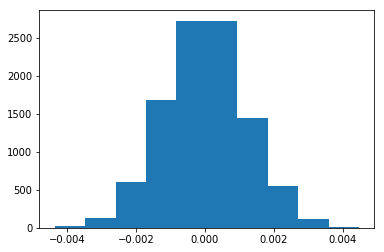

In [31]:
# by Method 1. as asked in task:
p_diffs_2 = np.array(p_diffs_2) 

plt.hist(p_diffs_2);

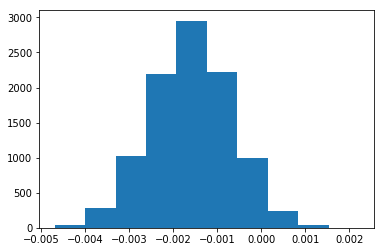

In [32]:
# Method 2. Bootstraping. Convert to numpy array
p_diffs = np.array(p_diffs)

# Plot sampling distribution
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

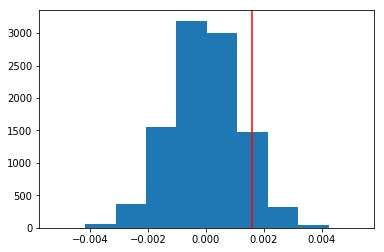

In [33]:
sample_var_2 = p_diffs_2.std()
null_vals_2 = np.random.normal(0,sample_var_2,10000)

plt.hist(null_vals_2);
plt.axvline(x=obs_diff,color='red');

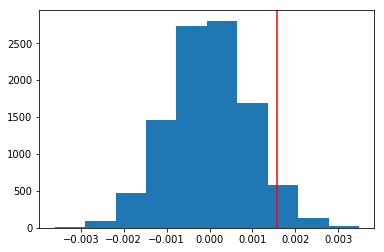

In [34]:
# Simulate distribution under the null hypothesis
sample_var = p_diffs.std()
null_vals = np.random.normal(0,sample_var,10000)


# Plot the null distribution
plt.hist(null_vals);
plt.axvline(x=obs_diff,color = "red");

In [35]:
(null_vals_2 > obs_diff).mean()

0.0903

In [36]:
(null_vals > obs_diff).mean()

0.046

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

** Method 1. As asked in task:
<br> 1. I simulated possible outcomes under H0 hypotesis, for the case when it would be no significant difference between conversions of two groups.
<br> 2. And by performing this sampling distribution (Method 1 by task)  it shoowed that, if Ho was true how far from 0, those values, differences in means, could be distributed  around 0 (0 - because difference in mean should be null by 0-hypotesis). I ploted that distribution under H0 hypotesis.
<br> 3.And then I plotted our actual observed difference in probabilites (conversions) to see whether it falls in this simulated distribution of possible outcomes if H0 was true or not, and how far from 0 is placed.
<br> 4.Our threshold for Error 1 we settled alpha = 0.05, which would mean that probability of observing our actual outcome of difference  in means under H0 hypotesis should fall within our distribution for 95% of times and only 5% of times could be allowed to be equal or more far away from 0. => We need to calculate what the probability of having outcomes more then observed difference under H0 and compare if that is more then 0.05 or less. If its more => our difference in conversions of two groups are not meaninful/not significant and could happened by chance. Which would mean that control and treatment groups perform equally. <br>Otherwise when that probability < 0.05, that it would mean that we have to reject H0 hypotesis in favor for H1, that our observed difference belongs to other distribution under H1 hypotesis and the difference between groups is significant.
<br> 5. In our case probability = 0.0981 , which is > alpha, which would mean the difference is insignificant => we failed to reject H0 hypotesis. => there is no signofocant difference in conversion between control and treatment groups.**

** Mephod 2. Bootsrapping. 
**

### Conclusion:
** =>  I performed sample distribution of differences with two ways. By  first method it showed that p-value is > predefined alpha = 0.05, which means that we observed our difference by chance and there is no statistical  difference between control and treatment group. But making it wsecond way, with different approach of bootstraping,  it shows that p-value is < 0,05, which would say that we sould reject Ho hypotesis and H1 is True. That there is a significant difference between group's conversions **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [100]:
import statsmodels.api as sm

convert_old = df2[(df2.converted == 1)&(df2.group == 'control')].shape[0]/df2[df2.group == 'control'].shape[0]
convert_new = df2[(df2.converted == 1)&(df2.group == 'treatment')].shape[0]/df2[df2.group == 'treatment'].shape[0]
n_old = df2[df2.group == 'control'].shape[0]
n_new = df2[df2.group == 'treatment'].shape[0]

In [101]:
convert_old

0.1203863045004612

In [102]:
convert_new

0.11880806551510564

In [103]:
convert_old-convert_new

0.0015782389853555567

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [104]:
from statsmodels.stats.proportion import proportions_ztest

In [105]:
n_control_successes = df2[(df2.converted == 1)&(df2.group == 'control')].shape[0]
n_treatment_successes = df2[(df2.converted == 1)&(df2.group == 'treatment')].shape[0]

In [106]:
n_control_successes


17489

In [107]:
n_treatment_successes

17264

In [116]:
stat, pval = proportions_ztest(count=[n_control_successes,n_treatment_successes], nobs=[n_old,n_new], value=0)
print('{0:0.3f}'.format(stat))
print('{0:0.3f}'.format(pval))

1.311
0.190


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**=>
<br> z-value means - how far our observed difference from mean value. Which would say probably, if this observed value is part of this 0-distribution or not...
<br> p-values computed in > alpha=0.05, which agreed with previous findings, that there is no significant difference between conversion of two groups **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [117]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [118]:
df['intercept'] = 1
df[['ab','ab_test']] = pd.get_dummies(df['group'])


In [119]:
df= df.drop(['group','ab'],axis=1)

In [120]:
df.head()

,user_id,timestamp,landing_page,converted,intercept,ab_test
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [121]:
import statsmodels.api as sm

In [122]:
log_mod = sm.Logit(df['converted'],df[['intercept','ab_test']])
result = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [123]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              215704.9004
Date:               2021-06-26 14:03 BIC:              215726.0864
No. Observations:   294478           Log-Likelihood:   -1.0785e+05
Df Model:           1                LL-Null:          -1.0785e+05
Df Residuals:       294476           LLR p-value:      0.21611    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9887    0.0080  -248.2967  0.0000  -2.0044  -1.9730
ab_test      -0.0140    0.0114    -1.2369  0.2161  -0.0363   0.0082
==================================================================

"""

In [124]:
np.exp(-0.014)

0.9860975442628619

In [125]:
1/np.exp(-0.014)

1.0140984589384923

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**=> p-value = 0.2161, which means that variable ab_test is not statistically significant.
<br> Why p-value is different? => no idea**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**=> the resulted summary showed that with each unit decrease in abtest , we havethe same resul of predicted variable , which is conversion rate. it doesnt help that much. Maybe that is why we need to consider extra variable to be included in the model.
<br> From disadvantages, that while adding more variables/features , the difference we will observe might happend by chance**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [128]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [129]:
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [130]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [131]:
### Create the necessary dummy variables
df_new['intercept'] = 1
df_new[['ab','ab_test']] = pd.get_dummies(df_new['group'])
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.tail()

,country,timestamp,group,landing_page,converted,intercept,ab,ab_test,CA,UK,US
user_id,,,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,1,0,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,1,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,1,0,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,0,1,1,0,0
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,1,0,0,1,0


In [132]:
df_new = df_new.drop(['country','group','ab'],axis=1)

In [133]:
df_new.head()

,timestamp,landing_page,converted,intercept,ab_test,CA,UK,US
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,old_page,0,1,0,0,1,0
928468,2017-01-23 14:44:16.387854,new_page,0,1,1,0,0,1
822059,2017-01-16 14:04:14.719771,new_page,1,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,old_page,0,1,0,0,1,0
710616,2017-01-16 13:14:44.000513,new_page,0,1,1,0,1,0


In [134]:
### Fit Your Linear Model And Obtain the Results
log_model2 = sm.Logit(df_new['converted'],df_new[['intercept','ab_test','UK','US']])
result2 = log_model2.fit()
result2.summary2()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-06-26 14:25 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_test       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [135]:
np.exp(-0.0149)

0.9852104557227469

In [136]:
1/np.exp(-0.0149)

1.0150115583846535

**=>
<br> 1. By adding extra variable "country" in our logistic regression model, we obtained p-value and z-score same as in Part2. Which means more accurate prediction probably, since better significance level...
<br> 2. But still, by applying logistic regression method we obtaine same outcome => the difference in conversion between Control and treatment group is not significant, which suggests that new feature didnt improve convertion rate, and is not worth of roll out to all users**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.